BIBLIOTECAS

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy.fft as fft

In [ ]:
#Funcion para mostrar imagenes
def show(img):
  canvas, axis = plt.subplots(figsize=(8,8))
  axis.imshow(img, interpolation="nearest")
  plt.tight_layout()
  plt.show()

#Tarea 4

##Indicaciones:

Describa detalladamente como funciona el procesamiento en el dominio de recuencia para la imagen y qué características pueden ser de utilidad para detectar el angulo de rotación de la imagen.

Elabore un procedimiento para detectar el angulo de rotación del texto en el espectro de frecuencias

Intente mejorar la imágen lo más posible.

##Descripción del Dominio de Frecuencias:

El dominio de frecuencias es la representación de imágenes digitales como si fueran señales. Los elementos y características de la imagen se pueden identificar en el dominio de frecuencias con funciones simples

*   Las funciones simples pueden separar el dominio para obtener diferentes porciones que representan una característica y poder manipularla.
*   En este dominio se trabaja con funciones como la transformada de Fourier que trabajan con frecuencias
*   El dominio de frecuencias se puede representar con funciones sinoidales (Seno), por lo que su rango es de -1 a 1
- La característica que se utilizará para rotar la imagen es identificar el ángulo de inclinación. Esto se hará recorriendo la matriz de la imagen para encontrar el patrón, luego se aplicarán operaciones de rotación para que la imagen ya no esté inclinada sino derecha. Para esto se utilizara la transformada de Fourier, que permitira utilizar el dominio de frecuencias y asi encontrar estas caracteristicas mas rapido

**Sobre la Transformada de Fourier:** Fourier es un filtro que trabaja en el dominio de frecuencias para obtener información/características de la imagen. Para ello, realiza operaciones complejas con números imaginarios y reales.
- Permite identificar información que no es evidente en el dominio temporal/espacial.
- Se puede eliminar ruido, resaltar bordes, eliminar objetos, etc.
- Es reversible, puede transformarse en cualquiera de los dominios (frecuencia o espacial) y pasar entre un dominio a otro.
-Permite tener la información de la imagen en un sistema de frecuencias tomando en cuenta la información del dominio espacial.





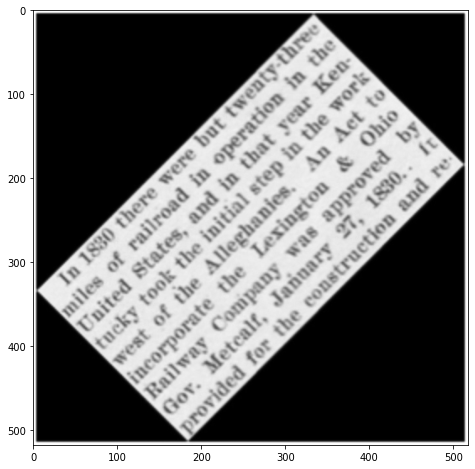

In [ ]:
#Cargar la imagen
rep4 = cv2.imread("Texto.jpg", cv2.IMREAD_GRAYSCALE)
rep4.shape

#Mostrar la imagen
plt.subplots(figsize=(8, 8))
plt.imshow(rep4, cmap="gray")

In [ ]:
#Funcion de la Transformada de Fourier
def fft_test(img):
  f = fft.fft2(img)
  fshift = fft.fftshift(f)
  mag_spectrum = 20*np.log(np.abs(fshift))
  mag_spectrum = np.asarray(mag_spectrum, dtype=np.uint8)
  return mag_spectrum
  
#Funcion para mostrar el dominio de frecuencias de la imagen luego de Fourier
def fft_show(img):
  mag_spectrum = fft_test(img)
  img_mag = np.concatenate((img, mag_spectrum), axis=1)

  plt.subplots(figsize=(16, 8))
  plt.imshow(img_mag, cmap="gray")
  return img_mag

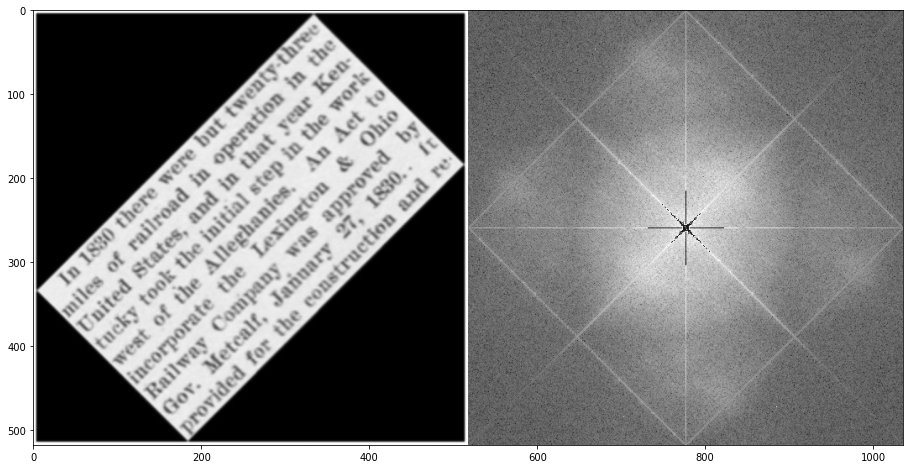

In [ ]:
#Mostrar imagen
rep4_mag = fft_show(rep4)

#Se puede ver que la imagen tiene un cuadrado que representa el texto girado de la imagen, por lo que se debe identificar el angulo de rotacion
#de la matriz de la nueva imagen para poder girar el texto de nuevo. 

In [ ]:
#Cargar la imagen
img = cv2.imread("/content/Texto.jpg")

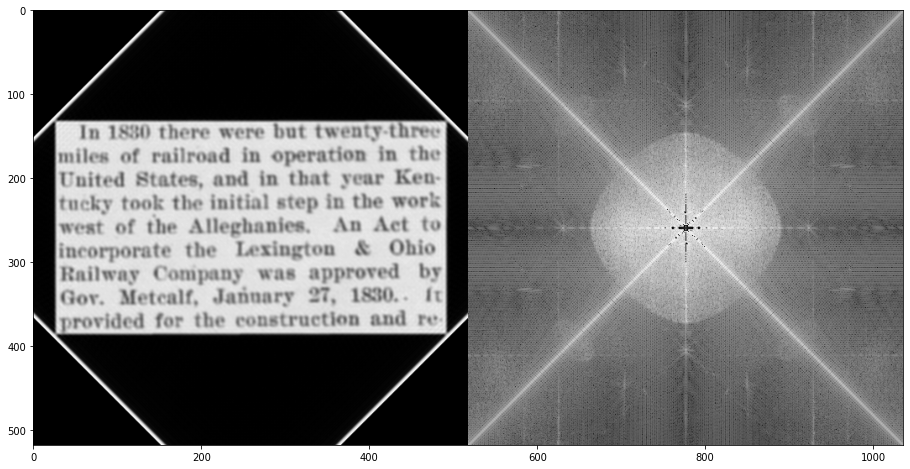

In [ ]:
#Rotar la imagen
w,h=rep4.shape
rotation_matrix = cv2.getRotationMatrix2D((w/2, h/2), 315, 1)
imgen_1 = cv2.warpAffine(img, rotation_matrix, (w, h))
bird_mag = fft_show(imgen_1)

#Se puede ver que el recuadro ya esta derecho y no en diagonal comparada con la anterior imagen

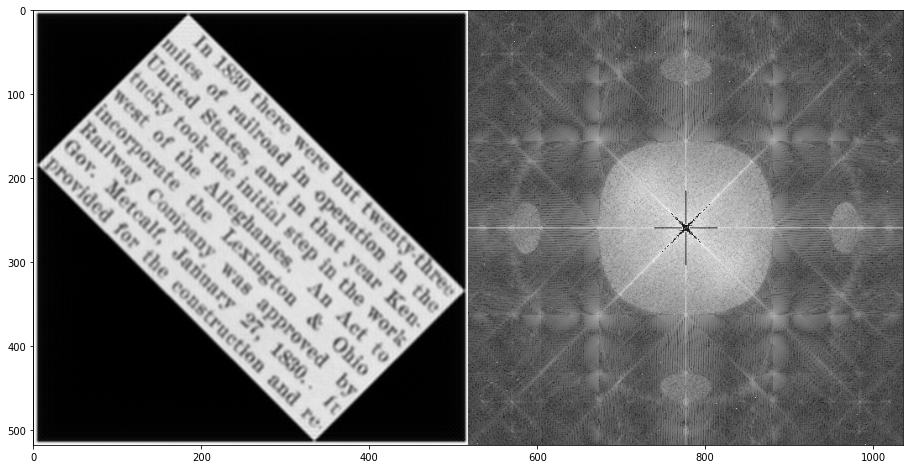

In [ ]:
w,h=rep4.shape
rotation_matrix = cv2.getRotationMatrix2D((w/2, h/2), 270, 1)
imgen_2 = cv2.warpAffine(img, rotation_matrix, (w, h))
bird_mag = fft_show(imgen_2)

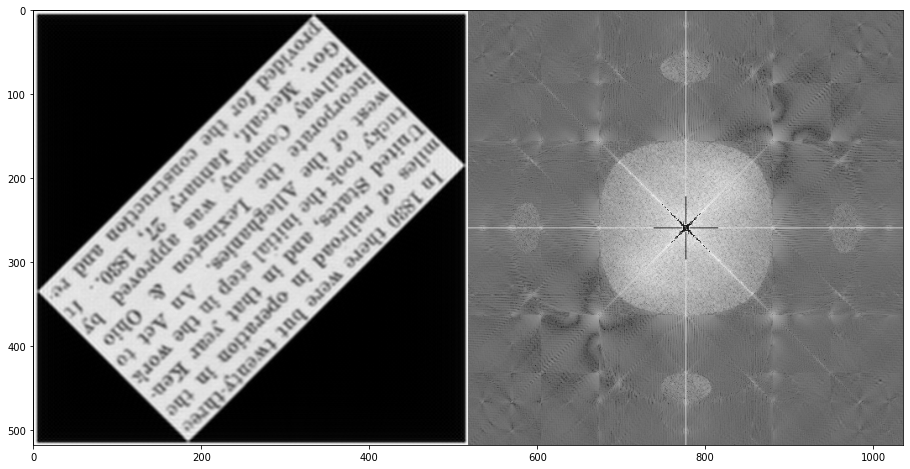

In [ ]:
w,h=rep4.shape
rotation_matrix = cv2.getRotationMatrix2D((w/2, h/2), 180, 1)
imgen_3 = cv2.warpAffine(img, rotation_matrix, (w, h))
bird_mag = fft_show(imgen_3)

##Procedimiento para mejorar la imagen:

La imagen se ve ligeramente borrosa y como si presentara algo de ruido, por ello, para hacerla mas legible se mejorará la calidad de la imagen. Para mejorar la imagen original se utiliza el filtro pseudo inverse ya que este filtro es bueno para restaurar imagenes en ese caso.

**IMPORTANTE!!!** Para que el codigo funcione, se debe subir la imagen en la carpeta de "Content" de collab

In [ ]:
#Librerias a importar
import numpy as np
import scipy.fftpack as fp
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
from skimage.restoration import wiener, unsupervised_wiener
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [ ]:
#Funcion del filtro Pseudo_Inverse
def pseudo_inverse_filter(y, h, epsilon):
  Hf = fp.fft2(fp.ifftshift(h))
  M, N = Hf.shape
  Hf[(np.abs(Hf) < epsilon)] = 0
  indices = np.where((np.abs(Hf) >= epsilon))
  Hf[indices] = np.ones((M, N))[indices] / Hf[indices]
  Yf = fp.fft2(y)
  I = Yf * Hf
  im = np.abs(fp.ifft2(I))
  return (im, Hf)

In [ ]:
#Funcion para poder ver el dominio de frecuencias
def plot_freq_filter(F, title, size=20):
  plt.imshow(20*np.log10(0.01 + np.abs(fp.fftshift(F))), cmap='coolwarm')
  plt.title(title, size=size)
  plt.colorbar()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.


(518, 518)
255


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.


(<matplotlib.axes._subplots.AxesSubplot at 0x7ff459b0ec90>, None)

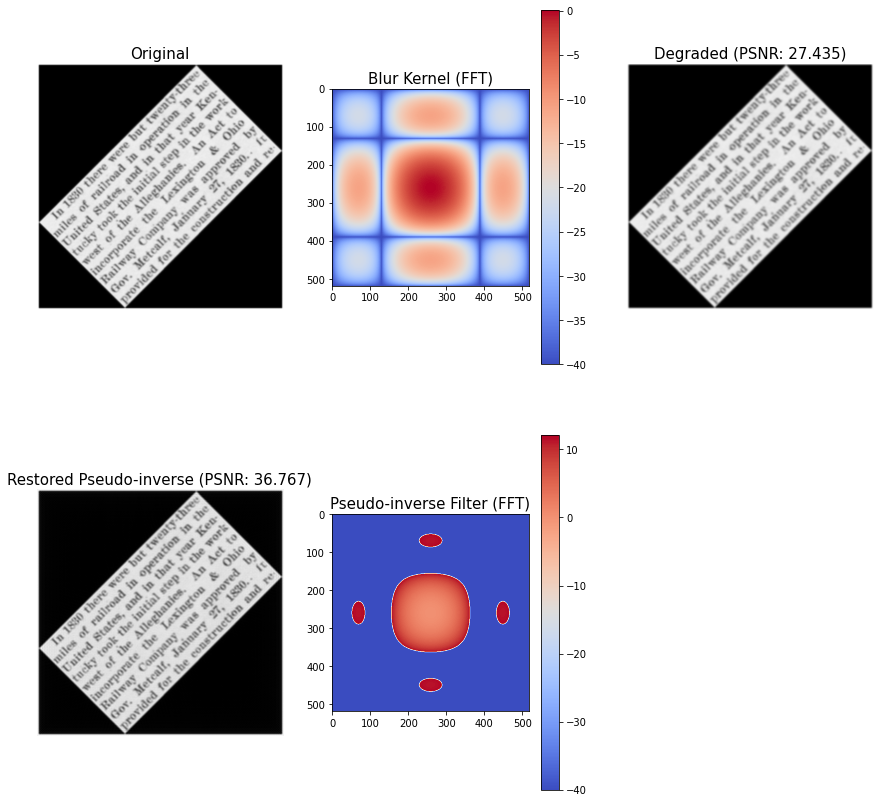

In [ ]:
#Preparación de la imagen para ser restaurada:
x = rgb2gray(imread('Texto.jpg'))
print(x.shape)
M, N = x.shape
print(np.max(x))

plt.figure(figsize=(15, 30))

plt.subplot(431), plt.imshow(x, cmap='gray'), plt.axis('off'), plt.title('Original', size=15)

h = np.ones((4, 4)) / 16
h = np.pad(h, [(M//2 - 2, M//2 - 2), (N//2 - 2, N//2 - 2)], 'constant')
sigma = 0.075
Xf = fp.fft2(x)
Hf = fp.fft2(fp.ifftshift(h))

plt.subplot(432), plt.imshow(20*np.log10(0.01 + np.abs(fp.fftshift(Hf))), cmap='coolwarm'),
plt.title('Blur Kernel (FFT)', size=15), plt.colorbar()

Y = Hf * Xf
y = fp.ifft2(Y).real + sigma * np.random.randn(M, N)

plt.subplot(433), plt.imshow(np.abs(y), cmap='gray'), plt.axis('off'),
plt.title(f'Degraded (PSNR: {np.round(psnr(x, y), 3)})', size=15)

## restauración con pseudo inverse
epsilon = 0.25
pix, F_pseudo = pseudo_inverse_filter(y, h, epsilon)

plt.subplot(434), plt.imshow(pix, cmap='gray'), plt.axis('off'),
plt.title(f'Restored Pseudo-inverse (PSNR: {np.round(psnr(x, pix), 3)})', size=15)

plt.subplot(435), plot_freq_filter(F_pseudo, 'Pseudo-inverse Filter (FFT)', size=15)

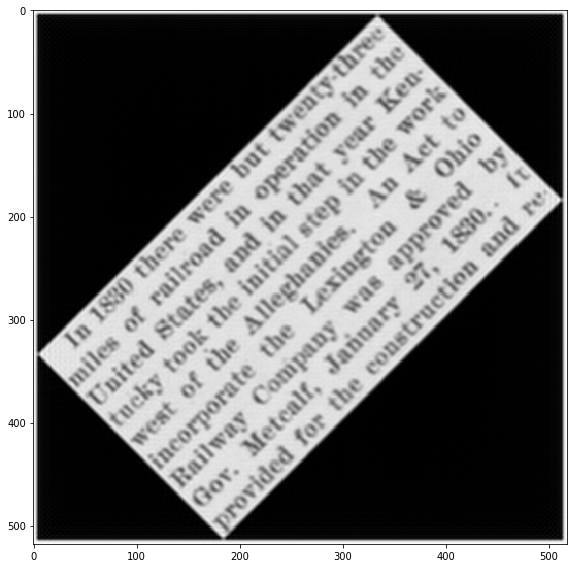

In [ ]:
#Mostrar imagen
show(pix)

#Tarea 5

Se hará uso de la imagen mejorado con Restored Pseudo-inverse para desarrolar la *Tarea 5*

In [ ]:
img = pix
#No es necesario invertir colores con img[:,:,::-1]

In [ ]:
#Funcion para mostrar la imagen
def show(img):
  canvas, axis = plt.subplots(figsize=(8,8))
  axis.imshow(img, interpolation="nearest", cmap='gray')
  plt.tight_layout()
  plt.show()

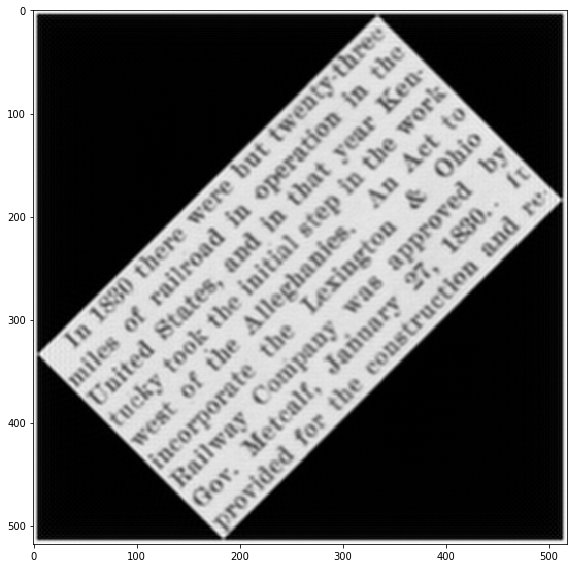

In [ ]:
#Mostrar la imagen
show(img)

(8 puntos) Describa detalladamente de 2 técnicas para rotar imagenes de manera procedural. (Solo rotar, no detectar rotación).

La primera técnica que utilizaremos es implementar un algoritmo usando la librería OpenCV, a continuación se describirán los pasos a seguir para realizar la rotación de la imagen:

1. Hacemos uso del método getRotationMatrix2D de cv2 y obtenemos la matriz de rotación, la cual necesita los valores del punto central de rotación de la imagen, el ángulo de rotación en grados y la escala de la imagen. Esto último, sirve para acomodar la imagen en la pantalla y no se pierda información.

2. Obtenemos el ancho y el alto de la imagen a la cual queremos rotar, con el método shape de numpy lo podemos obtener.

3. Hacemos uso del método wrapAffine de cv2, el cual nos permite obtener la imagen rotada según los parámetros previamente colocados en el método getRotationMatrix2D. Para lograr lo mencionado, debemos colocar como parámetros en el método wrapAffine la imagen que se desea rotar, el valor obtenido por el método getRotationMatrix2D y una tupla del ancho y el alto de la imagen que se quiere rotar.

***A CONTINUACIÓN REALIZAREMOS TODOS LOS PASOS MENCIONADOS***

La segunda técnica que utilizaremos es implementar un algoritmo usando la matriz de rotación de álgebra lineal, a continuación se describirán los pasos a seguir para realizar la rotación de la imagen:

1. Decidimos un centro de rotación para la imagen. Por un lado, podemos aplicar un método para hallar el centro adecuado según el ángulo de rotación que se desea realizar a la imagen. Por otro lado, podemos simplemente considerar el punto medio de la imagen.

2. Implementamos el método de rotación multiplicando la matriz de rotación en cada posición (i,j) de los píxeles de la imagen que se quiere rotar.

3. Recorremos toda la imagen recorriendo cada posición de los píxeles y los reemplazamos por sus nuevas posiciones asignadas por la matriz de rotación.

  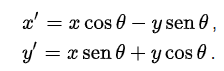 

***A CONTINUACIÓN REALIZAREMOS TODOS LOS PASOS MENCIONADOS***

(8 puntos) Aplique ambas técnicas al texto mejorado de la tarea 4.

Realizando la rotación a la imagen con algoritmo de rotación OpenCV

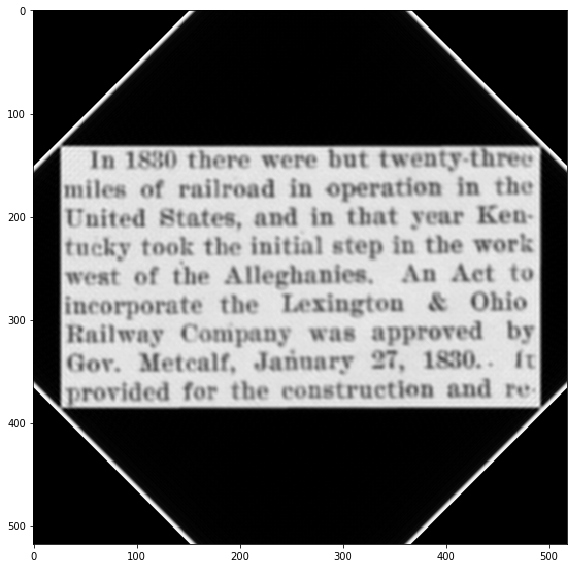

El tiempo de ejecución es: 0.36364126205444336


In [ ]:
start = time.time()
w,h=img.shape
rotation_matrix = cv2.getRotationMatrix2D((w/2, h/2), 315, 1)
rotatedImage = cv2.warpAffine(img, rotation_matrix, (w, h))
show(rotatedImage)
end = time.time()
print('El tiempo de ejecución es:',end - start)

Realizando la rotación a la imagen con matriz de rotación

In [ ]:
def rotate_center_x(cx,cy,axis):
  return ((cx-cx*np.cos(axis))-(cy*np.sin(axis)))

def rotate_center_y(cx,cy,axis):
  return ((cy+cx*np.sin(axis))-(cy*np.cos(axis)))

In [ ]:
def nx_rotated_v2(x,y,axis):
  return ((x*np.cos(axis))+(y*np.sin(axis))+rotate_center_x(h/2,h/2,theta))

def ny_rotated_v2(x,y,axis):
  return (-(x*np.sin(axis))+(y*np.cos(axis))+rotate_center_y(h/2,h/2,theta))

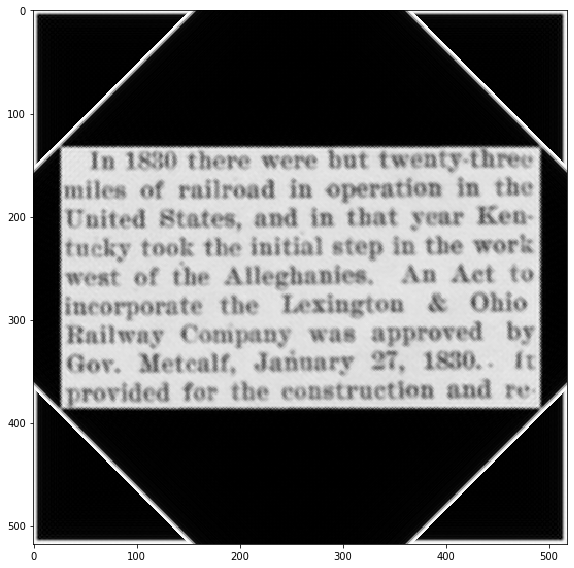

El tiempo de ejecución es: 4.060025453567505


In [ ]:
start = time.time()
h,w=img.shape
aux_rotate=img.copy()
theta=0.785398
for i in range(h):
  for j in range(w):
    y=ny_rotated_v2(j,i,theta)
    x=nx_rotated_v2(j,i,theta)
    if(y<=h and y>=0 and x<=w and x>=0):
      aux_rotate[i][j]= img[int(y)][int(x)]
show(aux_rotate)
end= time.time()
print('El tiempo de ejecución es:',end - start)

(4 puntos) Describa las diferencias de los resultados obtenidos de amba técnicas.

Las diferencias encontradas en cada técnica realizada son las siguientes:
*   El tiempo de ejecución del algoritmo utilizando openCV es menor al algoritmo de rotación implementado.
*   Se realizaron menos líneas de código utilizando los métodos de openCV
*   OpenCV no exige al programador tener el conocimiento previo de álgebra lineal para realizar la rotación
*   El algoritmo de rotación implementado solo realiza una rotación *simple*, en cambio, OpenCV permite modificar el tamaño de la imagen con la finalidad de que no se pierda información cuando la imagen sea rotada.



